# Kernelized Support Vector Machines

Principle : Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex mod‐ els that are not defined simply by hyperplanes in the input space. One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.
However, often we don’t know which features to add, and adding many features might make computation very expensive. *Kernel trick* : works by directly computing the distance (i.e. the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.
There are two ways to map your data into a higher-dimensional space that are com‐ monly used with support vector machines: the polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the Gaussian kernel.

In [1]:
%load_ext autoreload
%autoreload
from utils import feature_selection, PCA_reduction, perf, time_comparison

#import mglearn
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer

### First test

In [7]:
gt = pd.read_csv('../dumps/2020.01.13-14.25.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

svc = SVC()
svc.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

Accuracy on training set: 0.816
Accuracy on test set: 0.809


### Further tests

Kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane. We'll focus on the two last ones in this section.

Let's now carry on with a bigger dataset and try with different values of the parameters and try normalization.

In [12]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

#### Gamma

The *gamma* parameter controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The higher the gamma value it tries to exactly fit the training data set.

In [13]:
gammas = [0.1, 1, 10, 100]
for i in gammas:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 10
Accuracy on training set: 0.933
Accuracy on test set: 0.904
min_samples_split set to 100
Accuracy on training set: 0.971
Accuracy on test set: 0.913


Looks like we get better results with a gamma value of 100.

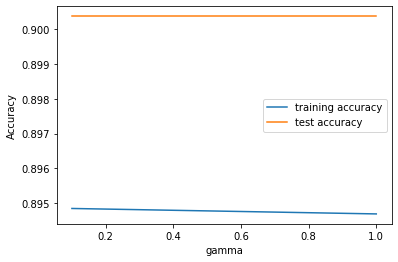

In [14]:
training_accuracy = [] 
test_accuracy = []
gammas = [0.1, 1]
for v in gammas:
    clf = SVC(kernel='rbf', gamma=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(gammas, training_accuracy, label="training accuracy") 
plt.plot(gammas, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

#### C

The *C* parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point.

In [15]:
c_values = [0.1, 1, 10, 100, 1000]
for i in c_values:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', C=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
min_samples_split set to 10
Accuracy on training set: 0.943
Accuracy on test set: 0.892
min_samples_split set to 100
Accuracy on training set: 0.962
Accuracy on test set: 0.868
min_samples_split set to 1000
Accuracy on training set: 0.973
Accuracy on test set: 0.852


Better results are acquired with smaller C values for the test set.

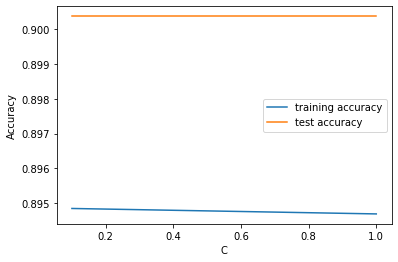

In [16]:
training_accuracy = [] 
test_accuracy = []
c_values = [0.1, 1]
for v in c_values:
    clf = SVC(kernel='rbf', C=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(c_values, training_accuracy, label="training accuracy") 
plt.plot(c_values, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

#### Degree

*degree* is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

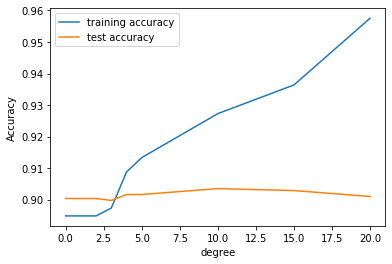

In [31]:
training_accuracy = [] 
test_accuracy = []
degrees = [0, 1, 2, 3, 4, 5, 10,15,20]
for v in degrees:
    clf = SVC(kernel='poly', degree=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(degrees, training_accuracy, label="training accuracy") 
plt.plot(degrees, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("degree")
plt.legend()

As we can see, the more we increase the degree the more we get a better training set accuracy while the test one stays linear. We might be overfitting at some point and therefore keep a reasonable value around *degree=10* max. One also has to know that higher degree means higher computing times.

### Best match

In [2]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [28]:
parameters = {'kernel': ['rbf','poly'], 'gamma' : [0.1,1,10,100,1000], 'C': [0.1,1,10,100,1000]}
clf = GridSearchCV(SVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

KeyboardInterrupt: 

In [ ]:
parameters = {'kernel': ['rbf','poly'], 'gamma' : [0.1,1,10,100,1000], 'C': [0.1,1,10,100,1000]}
clf = RandomizedSearchCV(SVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

In [4]:
svc = SVC(kernel='poly',C=0.1,gamma=100,degree=3)
svc.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.865


### Comparison between different kind of datasets

In [2]:
perf('../dumps/control_8000_false_3.csv','svm',False)

Accuracy on training set: 0.941
Accuracy on test set: 0.942


#### Different thresholds

In [4]:
perf('../dumps/default_1.csv','svm',False)

Accuracy on training set: 0.902
Accuracy on test set: 0.902


In [5]:
perf('../dumps/default_2.csv','svm',False)

Accuracy on training set: 0.919
Accuracy on test set: 0.916


In [6]:
perf('../dumps/default_4.csv','svm',False)

Accuracy on training set: 0.956
Accuracy on test set: 0.957


In [7]:
perf('../dumps/default_5.csv','svm',False)

Accuracy on training set: 0.956
Accuracy on test set: 0.957


#### Errors considered as positive result from detector

In [9]:
perf('../dumps/error_as_packed.csv','svm',False)

Accuracy on training set: 0.920
Accuracy on test set: 0.916


#### Check influence of each detector

In [11]:
perf('../dumps/not_die.csv','svm',False)

Accuracy on training set: 0.948
Accuracy on test set: 0.941


In [12]:
perf('../dumps/not_cisco.csv','svm',False)

Accuracy on training set: 0.953
Accuracy on test set: 0.959


In [13]:
perf('../dumps/not_manalyze.csv','svm',False)

Accuracy on training set: 0.955
Accuracy on test set: 0.954


In [14]:
perf('../dumps/not_peid.csv','svm',False)

Accuracy on training set: 0.956
Accuracy on test set: 0.956


In [15]:
perf('../dumps/not_peframe.csv','svm',False)

Accuracy on training set: 0.956
Accuracy on test set: 0.956


#### Only boolean values

In [2]:
perf('../dumps/control_8000_false_3.csv','svm',True)

Most important : 

Accuracy on training set: 0.997
Accuracy on test set: 0.988
---------------

All features : 

Accuracy on training set: 0.999
Accuracy on test set: 0.996


### Feature relevance

In [ ]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
svc = SVC(kernel='poly',C=0.1,gamma=100,degree=10)
svc.fit(data_train, target_train)

In [ ]:
feature_selection('../dumps/2020.02.10-12.14.csv',0.15,"svm")

Same issue as KNN, doesn't make that much sense to speak in terms of feature importance.

### Test on Thomas datasets

In [5]:
gt = pd.read_csv("../dumps/2019-08.Merged_thomas.csv")
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

tree = SVC(kernel='poly',C=0.1,gamma=100,degree=3)
tree.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Accuracy on training set: 0.973
Accuracy on test set: 0.969


In [23]:
gt = pd.read_csv("../dumps/2019-09.Merged_thomas.csv")
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

tree = SVC(kernel='poly',C=1000)
tree.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Accuracy on training set: 0.871
Accuracy on test set: 0.869


### PCA

One has to know that running a SVM algorithm is pretty time and resource-consuming, therefore computing the PCA on a dataset with 14K samples didn't give any result for days after being launched. That's why we're gonna do it iteratively to see when we cross a reasonably fair threshold.

In [ ]:
PCA_reduction('../dumps/2020.03.11-17.39.csv','svm')

In [ ]:
path = "../dumps/"
datasets = ["2K.csv","3.7K.csv","5.7K.csv","7.2K.csv","8.7K.csv","10.4K.csv","12.4K.csv","14.3K.csv","16K.csv"]
for i in datasets:
    print("Size of dataset : %s" % i.replace('.csv',''))
    start = time.time()
    PCA_reduction(path+i,'svm')
    end = time.time() - start
    print("Time in seconds : %f" % end)
    print("--------------------------")

Size of dataset : 2K
  Variance    Training acc    Test acc    Components    Time (s)
----------  --------------  ----------  ------------  ----------
      1                  1      0.995            119   0.704422
      0.99               1      0.995             97   0.170115
      0.95               1      0.995             74   0.126247
      0.9                1      0.9975            58   0.103967
      0.85               1      0.995             46   0.0806599
Time in seconds : 1.801016
--------------------------
Size of dataset : 3.7K
  Variance    Training acc    Test acc    Components    Time (s)
----------  --------------  ----------  ------------  ----------
      1           0.988579    0.975839           119    0.150638
      0.99        0.980517    0.963758           100    0.263625
      0.95        0.97783     0.962416            78    0.137432
      0.9         0.97951     0.971812            60    0.119783
      0.85        0.989923    0.974497            48    0.115

### Time fiability

Without normalization :

In [8]:
gt = pd.read_csv("../dumps/default_20190615_6000.csv")
cols = [col for col in gt.columns if col not in ['label']]
data_train = gt[cols]
target_train = gt['label']

tree = SVC(kernel='poly',C=0.1,gamma=100,degree=3)
tree.fit(data_train, target_train)
dump(tree,"snapshots/svm_default_20190615_6000.joblib")

['snapshots/svm_default_20190615_6000.joblib']

In [9]:
tree = load("snapshots/svm_default_20190615_6000.joblib")

gt = pd.read_csv("../dumps/default_20190808_1000.csv")
cols = [col for col in gt.columns if col not in ['label']]
data_test = gt[cols]
target_test = gt['label']

scaler = Normalizer()
scaler.fit(data_train)
data_test = scaler.transform(data_test)

print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Accuracy on training set: 0.095
Accuracy on test set: 0.104


With normalization :

In [12]:
gt = pd.read_csv("../dumps/default_20190615_6000.csv")
cols = [col for col in gt.columns if col not in ['label']]
data_train = gt[cols]
target_train = gt['label']

scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)

tree = SVC(kernel='poly',C=0.1,gamma=100,degree=3)
tree.fit(data_train, target_train)
dump(tree,"snapshots/svm_default_20190615_6000.joblib")

['snapshots/svm_default_20190615_6000.joblib']

In [13]:
tree = load("snapshots/svm_default_20190615_6000.joblib")

gt = pd.read_csv("../dumps/default_20190808_1000.csv")
cols = [col for col in gt.columns if col not in ['label']]
data_test = gt[cols]
target_test = gt['label']

data_test = scaler.transform(data_test)

print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.910


Conclusion : 
    - first, here we can see the importance of normalization, on the training and test set
    - then, we can also see that performances over time are quite constant, which means that this classifier is quite good to limit overfit and doesn't globalize too much. Nevertheless, it's still quite resource consuming.

#### Long run

In [ ]:
time_comparison('svm')